In [2]:
import os
import datetime

import math
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime

from clean import as_date
sys.path.insert(1, '../src')

ImportError: cannot import name 'as_date' from 'clean' (/Users/armins/Dev/mempool-predictor/.venv/lib/python3.9/site-packages/clean/__init__.py)

In [3]:
df = pd.read_json('../data/clean/clean_data_v2.json')

Text(0.5, 0, 'Time')

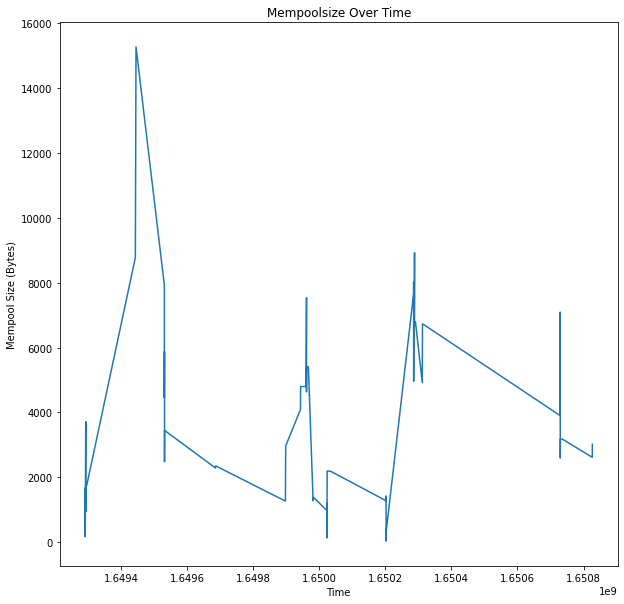

In [ ]:
## Sort by mempool date
df = df.sort_values(by = ['mempooldate'])
plt.figure(figsize = (10,10))
plt.plot(df.mempooldate, df.mempoolsize)
plt.title('Mempoolsize Over Time')
plt.ylabel('Mempool Size (Bytes)')
plt.xlabel('Time')

In [ ]:
df.head()

,feerate,fee,mempooldate,mempoolgrowthrate,networkdifficulty,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,...,averagemempoolfeerate,averagemempooltxsize,recommendedfeerates,txid,hash,version,size,vsize,weight,locktime
194572,0.521614,181,1649290132,879.733333,00000000000000000009c4ea6ade8048cb72b963a7705d...,25.163763,781,4.313388e+07,1.998318e+08,43189.03,...,4.80272,935.403329,"[5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]",dc6c72766e031952093498af9e83b81658d44d9e33e34a...,34d147f1c1a91a33b1f5076937c5cb9f986e6f81477ac2...,2,347,179,716,730766
223860,4.892377,1091,1649290132,879.733333,00000000000000000009c4ea6ade8048cb72b963a7705d...,25.163763,781,4.313388e+07,1.998318e+08,43189.03,...,4.80272,935.403329,"[5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]",fdd6aa41876366aaa9ffae5d0b9ca901b5afd573aa1060...,528d93923705a74a3a16a79cc5c2587a34055cfe89b193...,1,223,142,565,0
53500,17.271277,3247,1649290132,879.733333,00000000000000000009c4ea6ade8048cb72b963a7705d...,25.163763,781,4.313388e+07,1.998318e+08,43189.03,...,4.80272,935.403329,"[5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]",3ca91d03e9b6413ead775c41c57c6d609e649b3943fcc9...,3ca91d03e9b6413ead775c41c57c6d609e649b3943fcc9...,2,188,188,752,0
188757,6.637306,1281,1649290132,879.733333,00000000000000000009c4ea6ade8048cb72b963a7705d...,25.163763,781,4.313388e+07,1.998318e+08,43189.03,...,4.80272,935.403329,"[5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]",d5d8b055438fe93babe8d708fd0da3b35aa234c783caea...,94b1b93931dfe1c1a07d60e5cde452d8bfb7155bebbd16...,2,193,111,442,0
61846,5.340541,1976,1649290132,879.733333,00000000000000000009c4ea6ade8048cb72b963a7705d...,25.163763,781,4.313388e+07,1.998318e+08,43189.03,...,4.80272,935.403329,"[5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]",46251d174a2593416291b0e2660e2f72a7a61dbb8ee59d...,5288d47e6491853c339f663fc814fe2b6e62baed617b5e...,2,370,208,832,0


In [ ]:
df.columns

Index(['feerate', 'fee', 'mempooldate', 'mempoolgrowthrate',
       'networkdifficulty', 'averageconfirmationtime', 'mempoolsize',
       'minerrevenue', 'totalhashrate', 'marketprice', 'dayofweek',
       'hourofday', 'monthofyear', 'averagemempoolfee',
       'averagemempoolfeerate', 'averagemempooltxsize', 'recommendedfeerates',
       'txid', 'hash', 'version', 'size', 'vsize', 'weight', 'locktime'],
      dtype='object')

In [8]:
df.drop(columns = [ 'vsize', 'locktime', 'version', 'networkdifficulty', 'hash', 'txid'], inplace = True)

In [ ]:
df.head()

,feerate,fee,mempoolgrowthrate,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,dayofweek,hourofday,monthofyear,averagemempoolfee,averagemempoolfeerate,averagemempooltxsize,recommendedfeerates,txid,hash,size,weight
mempooldate,,,,,,,,,,,,,,,,,,,
2022-04-06 20:08:52,0.521614,181,879.733333,25.163763,781,4.313388e+07,1.998318e+08,43189.03,2,20,4,2023.798976,4.80272,935.403329,"[5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]",dc6c72766e031952093498af9e83b81658d44d9e33e34a...,34d147f1c1a91a33b1f5076937c5cb9f986e6f81477ac2...,347,716
2022-04-06 20:08:52,4.892377,1091,879.733333,25.163763,781,4.313388e+07,1.998318e+08,43189.03,2,20,4,2023.798976,4.80272,935.403329,"[5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]",fdd6aa41876366aaa9ffae5d0b9ca901b5afd573aa1060...,528d93923705a74a3a16a79cc5c2587a34055cfe89b193...,223,565
2022-04-06 20:08:52,17.271277,3247,879.733333,25.163763,781,4.313388e+07,1.998318e+08,43189.03,2,20,4,2023.798976,4.80272,935.403329,"[5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]",3ca91d03e9b6413ead775c41c57c6d609e649b3943fcc9...,3ca91d03e9b6413ead775c41c57c6d609e649b3943fcc9...,188,752
2022-04-06 20:08:52,6.637306,1281,879.733333,25.163763,781,4.313388e+07,1.998318e+08,43189.03,2,20,4,2023.798976,4.80272,935.403329,"[5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]",d5d8b055438fe93babe8d708fd0da3b35aa234c783caea...,94b1b93931dfe1c1a07d60e5cde452d8bfb7155bebbd16...,193,442
2022-04-06 20:08:52,5.340541,1976,879.733333,25.163763,781,4.313388e+07,1.998318e+08,43189.03,2,20,4,2023.798976,4.80272,935.403329,"[5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]",46251d174a2593416291b0e2660e2f72a7a61dbb8ee59d...,5288d47e6491853c339f663fc814fe2b6e62baed617b5e...,370,832


In [4]:
def as_date(ts):
  return(datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

df.mempooldate = pd.to_datetime(df.mempooldate.apply(as_date))
df.set_index('mempooldate', drop = True, inplace=True)

In [ ]:
df.corr()

,feerate,fee,mempoolgrowthrate,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,dayofweek,hourofday,monthofyear,averagemempoolfee,averagemempoolfeerate,averagemempooltxsize,size,weight
feerate,1.000000,0.999981,0.000282,0.000196,0.000890,-0.002762,0.006171,-0.002681,0.002563,0.000831,NaN,-0.003137,-0.002464,-0.001883,-0.000403,-0.000375
fee,0.999981,1.000000,0.000283,0.000194,0.000877,-0.002763,0.006175,-0.002681,0.002558,0.000834,NaN,-0.003146,-0.002475,-0.001884,-0.000403,-0.000376
mempoolgrowthrate,0.000282,0.000283,1.000000,-0.009751,-0.068107,0.278337,-0.164984,0.490499,-0.100709,0.299624,NaN,0.054971,0.119825,0.221562,-0.005259,-0.005792
averageconfirmationtime,0.000196,0.000194,-0.009751,1.000000,-0.048097,-0.586563,0.242984,0.302811,0.463734,0.117878,NaN,0.244512,0.352991,-0.392990,-0.002285,-0.003890
mempoolsize,0.000890,0.000877,-0.068107,-0.048097,1.000000,0.306104,-0.020201,0.093736,-0.355836,0.004279,NaN,-0.088694,-0.028132,0.226425,-0.005241,-0.006349
minerrevenue,-0.002762,-0.002763,0.278337,-0.586563,0.306104,1.000000,-0.621734,0.252891,-0.792124,0.336668,NaN,-0.024612,-0.173911,0.831415,0.013168,0.013493
totalhashrate,0.006171,0.006175,-0.164984,0.242984,-0.020201,-0.621734,1.000000,-0.299159,0.551044,-0.003501,NaN,-0.316611,-0.251592,-0.387629,-0.010770,-0.012128
marketprice,-0.002681,-0.002681,0.490499,0.302811,0.093736,0.252891,-0.299159,1.000000,0.030498,0.359532,NaN,0.429280,0.537907,0.104261,-0.001465,-0.004220
dayofweek,0.002563,0.002558,-0.100709,0.463734,-0.355836,-0.792124,0.551044,0.030498,1.000000,-0.074334,NaN,-0.114176,0.030817,-0.679060,-0.015484,-0.017245
hourofday,0.000831,0.000834,0.299624,0.117878,0.004279,0.336668,-0.003501,0.359532,-0.074334,1.000000,NaN,-0.051129,-0.191418,0.422358,0.010426,0.014085


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feerate,225769.0,4.183968e+11,1.098579e+14,3.845872e-01,2.500000e+00,4.406250e+00,6.693548e+00,3.897910e+16
fee,225769.0,9.395425e+13,2.462955e+16,1.100000e+02,7.250000e+02,1.193000e+03,2.260000e+03,8.692339e+18
mempoolgrowthrate,225769.0,1.098897e+03,2.043611e+02,7.675833e+02,1.005567e+03,1.104267e+03,1.104267e+03,2.050767e+03
averageconfirmationtime,225769.0,2.303631e+01,8.169740e+00,6.230126e+00,1.938556e+01,2.343742e+01,3.010763e+01,3.097509e+01
mempoolsize,225769.0,4.264457e+03,2.215431e+03,2.900000e+01,2.189000e+03,4.798000e+03,5.240000e+03,1.527600e+04
minerrevenue,225769.0,3.682752e+07,2.533977e+06,3.408705e+07,3.560563e+07,3.593425e+07,3.593425e+07,4.313388e+07
totalhashrate,225769.0,2.040286e+08,2.412802e+06,1.998302e+08,2.020308e+08,2.040258e+08,2.040258e+08,2.092651e+08
marketprice,225769.0,4.066019e+04,1.000399e+03,3.928557e+04,3.994388e+04,4.020921e+04,4.115164e+04,4.355957e+04
dayofweek,225769.0,3.118865e+00,1.507679e+00,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
hourofday,225769.0,1.091803e+01,3.681237e+00,7.000000e+00,9.000000e+00,9.000000e+00,1.400000e+01,2.000000e+01


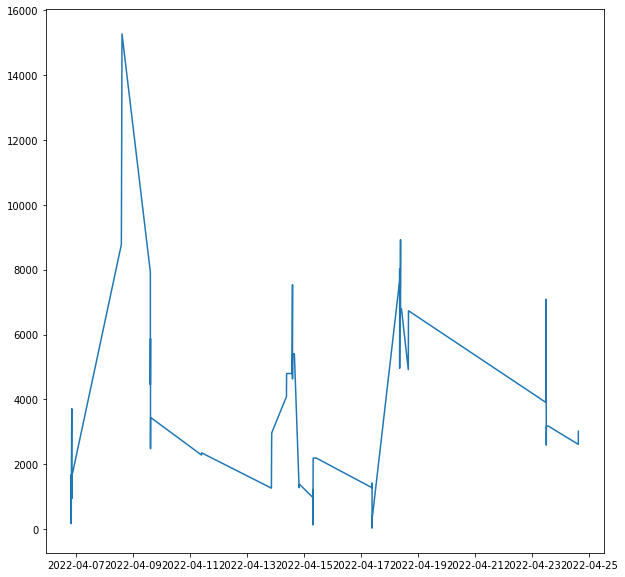

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(df.index, df.mempoolsize);

In [ ]:
df.recommendedfeerates

mempooldate
2022-04-06 20:08:52    [5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]
2022-04-06 20:08:52    [5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]
2022-04-06 20:08:52    [5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]
2022-04-06 20:08:52    [5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]
2022-04-06 20:08:52    [5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0]
                                      ...                 
2022-04-24 14:58:43    [4.0, 4.0, 3.0, 3.0, 1.0, 1.0, 1.0]
2022-04-24 14:58:44    [4.0, 4.0, 3.0, 3.0, 1.0, 1.0, 1.0]
2022-04-24 14:58:44    [4.0, 4.0, 3.0, 3.0, 1.0, 1.0, 1.0]
2022-04-24 14:58:44    [4.0, 4.0, 3.0, 3.0, 1.0, 1.0, 1.0]
2022-04-24 14:58:44    [4.0, 4.0, 3.0, 3.0, 1.0, 1.0, 1.0]
Name: recommendedfeerates, Length: 225769, dtype: object

In [5]:
df['recommendedfeerates_1_block_target'] = df['recommendedfeerates'].map(lambda fee_rates: fee_rates[0])
df['recommendedfeerates_2_block_target'] = df['recommendedfeerates'].map(lambda fee_rates: fee_rates[1])
df['recommendedfeerates_3_block_target'] = df['recommendedfeerates'].map(lambda fee_rates: fee_rates[2])
df['recommendedfeerates_4_block_target'] = df['recommendedfeerates'].map(lambda fee_rates: fee_rates[3])
df['recommendedfeerates_5_block_target'] = df['recommendedfeerates'].map(lambda fee_rates: fee_rates[4])
df['recommendedfeerates_6_block_target'] = df['recommendedfeerates'].map(lambda fee_rates: fee_rates[5])
df['recommendedfeerates_7_block_target'] = df['recommendedfeerates'].map(lambda fee_rates: fee_rates[6])


Skipped over networkdifficulty
Skipped over recommendedfeerates
Skipped over txid
Skipped over hash


/Users/armins/Dev/mempool-predictor/.venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


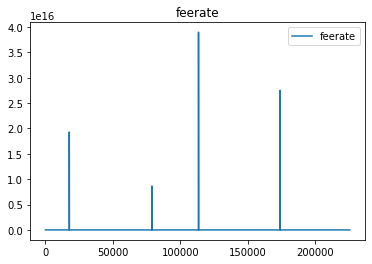

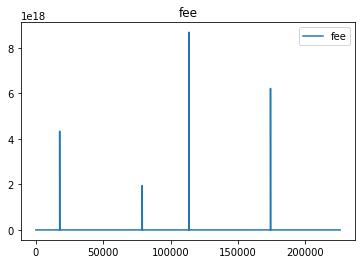

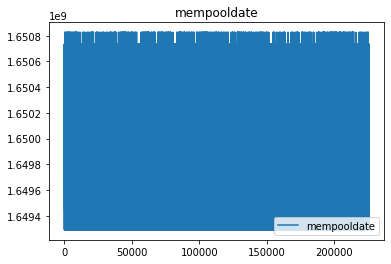

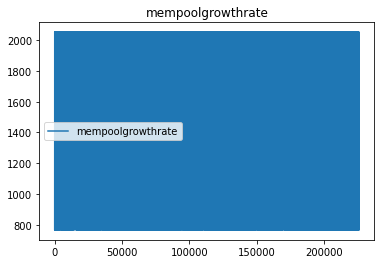

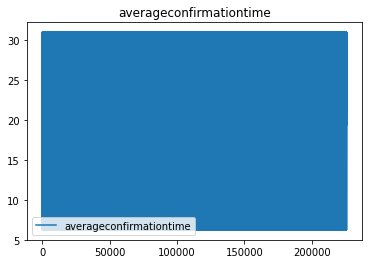

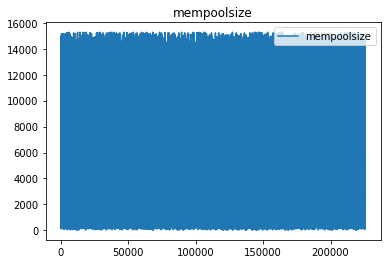

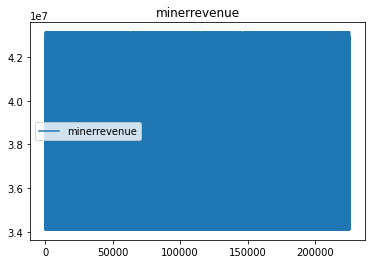

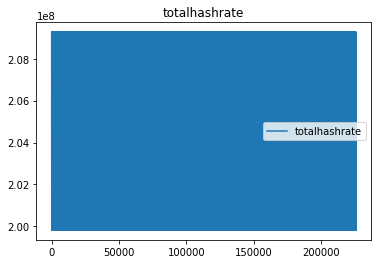

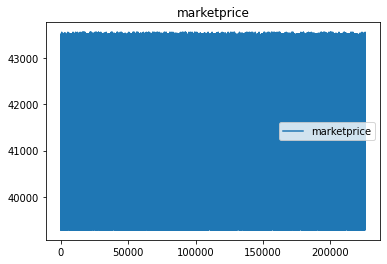

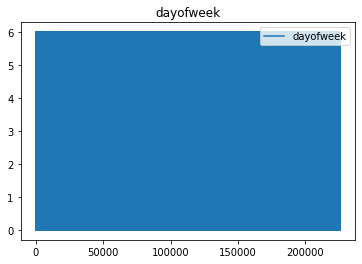

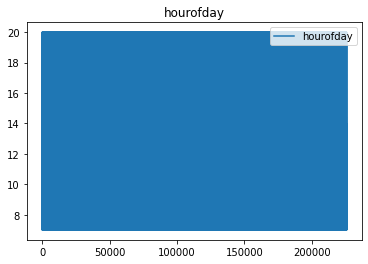

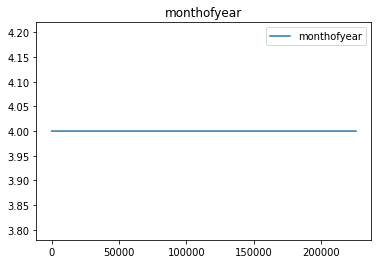

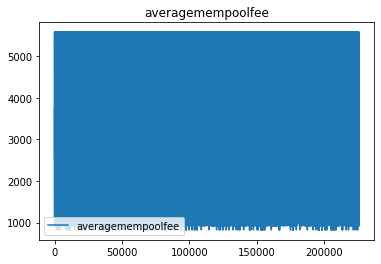

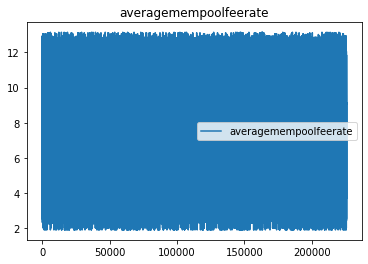

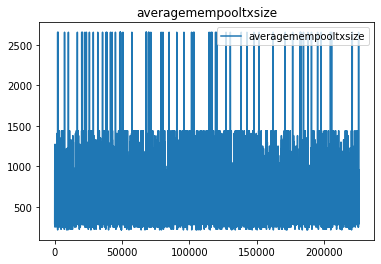

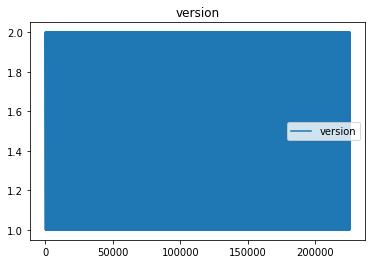

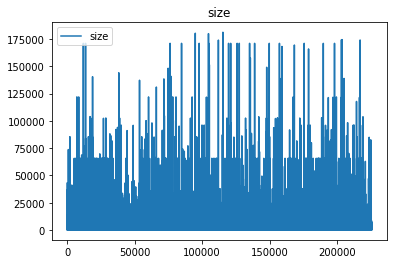

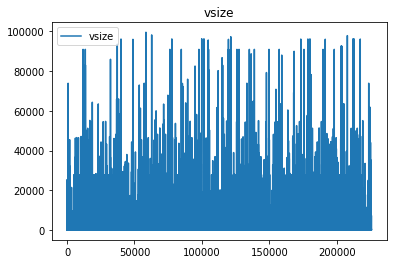

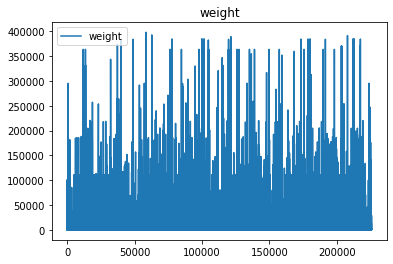

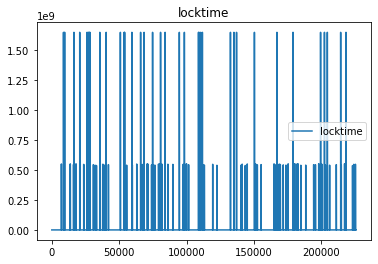

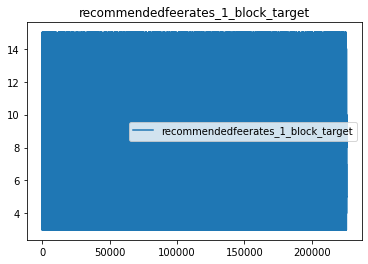

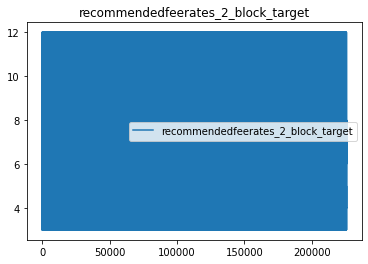

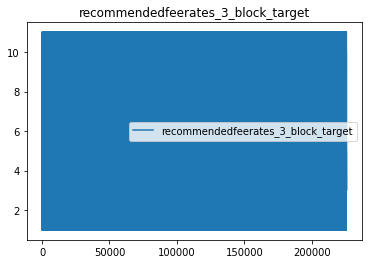

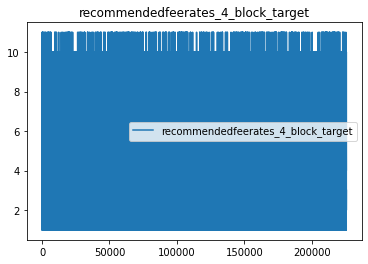

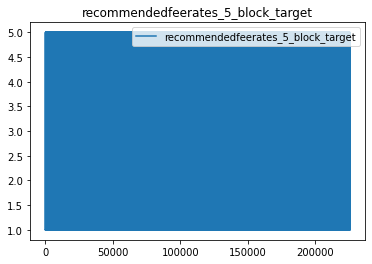

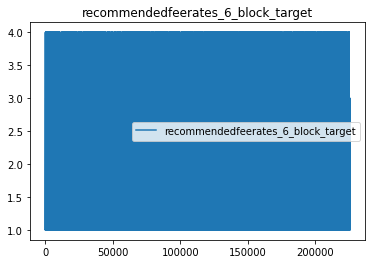

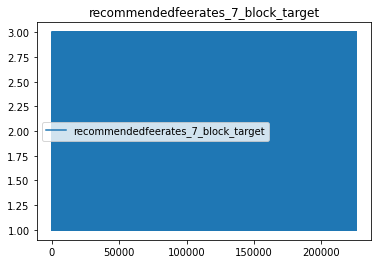

In [5]:
df.columns
for col in df.columns:
    try:
        df.plot(use_index=True, y=col, kind='line', title=col)
    except:
        print('Skipped over %s' % col)

In [22]:
df.drop(columns = ['recommendedfeerates', 'monthofyear'], inplace = True)

df.head()

,feerate,fee,mempoolgrowthrate,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,dayofweek,hourofday,...,averagemempooltxsize,size,weight,recommendedfeerates_1_block_target,recommendedfeerates_2_block_target,recommendedfeerates_3_block_target,recommendedfeerates_4_block_target,recommendedfeerates_5_block_target,recommendedfeerates_6_block_target,recommendedfeerates_7_block_target
mempooldate,,,,,,,,,,,,,,,,,,,,,
2022-04-17 09:43:22,-0.003809,-0.003815,-1.597319,-1.635959,-1.741628,-1.081489,0.913125,-0.213315,1.910974,-0.521029,...,-1.138716,-0.024327,-0.014224,-1.908562,-1.688092,-2.213083,-1.980887,-0.668222,-0.560533,-0.510599
2022-04-15 09:07:12,-0.003809,-0.003815,-0.052749,-0.446863,-0.936818,-0.482206,-0.842542,-0.450800,0.584432,-1.064325,...,-0.901627,-0.069767,-0.090377,-0.865399,-1.176103,-0.994713,-0.710178,-0.668222,-0.560533,-0.510599
2022-04-09 14:52:31,-0.003809,-0.003815,-0.818225,0.971730,0.112639,0.194408,0.082987,1.828910,1.247703,0.837210,...,-0.843174,-0.113524,-0.130911,1.742508,0.359866,0.223657,-0.074823,0.782231,-0.560533,-0.510599
2022-04-15 08:00:38,-0.003809,-0.003815,-0.052749,-0.446863,-0.936818,-0.482206,-0.842542,-0.450800,0.584432,-1.064325,...,-0.901627,-0.007978,0.044972,-0.865399,-1.176103,-0.994713,-0.710178,-0.668222,-0.560533,-0.510599
2022-04-14 10:16:46,-0.003809,-0.003815,0.026277,0.865551,0.240830,-0.352520,-0.001152,0.491254,-0.078840,-0.521029,...,-0.233738,-0.105831,-0.118369,0.699345,0.871856,0.223657,-0.074823,-0.668222,-0.560533,-0.510599


In [23]:
for col in df.columns:
    print(col)
    std = df[col].std()
    mean = df[col].mean()
    df[col] = df[col].map(lambda val: (val - mean) / std )
    

feerate
fee
mempoolgrowthrate
averageconfirmationtime
mempoolsize
minerrevenue
totalhashrate
marketprice
dayofweek
hourofday
averagemempoolfee
averagemempoolfeerate
averagemempooltxsize
size
weight
recommendedfeerates_1_block_target
recommendedfeerates_2_block_target
recommendedfeerates_3_block_target
recommendedfeerates_4_block_target
recommendedfeerates_5_block_target
recommendedfeerates_6_block_target
recommendedfeerates_7_block_target


In [12]:
df.head(20)

,feerate,fee,mempoolgrowthrate,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,dayofweek,hourofday,...,averagemempooltxsize,size,weight,recommendedfeerates_1_block_target,recommendedfeerates_2_block_target,recommendedfeerates_3_block_target,recommendedfeerates_4_block_target,recommendedfeerates_5_block_target,recommendedfeerates_6_block_target,recommendedfeerates_7_block_target
mempooldate,,,,,,,,,,,,,,,,,,,,,
2022-04-17 09:43:22,-0.003809,-0.003815,-1.597319,-1.635959,-1.741628,-1.081489,0.913125,-0.213315,1.910974,-0.521029,...,-1.138716,-0.024327,-0.014224,-1.908562,-1.688092,-2.213083,-1.980887,-0.668222,-0.560533,-0.510599
2022-04-15 09:07:12,-0.003809,-0.003815,-0.052749,-0.446863,-0.936818,-0.482206,-0.842542,-0.450800,0.584432,-1.064325,...,-0.901627,-0.069767,-0.090377,-0.865399,-1.176103,-0.994713,-0.710178,-0.668222,-0.560533,-0.510599
2022-04-09 14:52:31,-0.003809,-0.003815,-0.818225,0.971730,0.112639,0.194408,0.082987,1.828910,1.247703,0.837210,...,-0.843174,-0.113524,-0.130911,1.742508,0.359866,0.223657,-0.074823,0.782231,-0.560533,-0.510599
2022-04-15 08:00:38,-0.003809,-0.003815,-0.052749,-0.446863,-0.936818,-0.482206,-0.842542,-0.450800,0.584432,-1.064325,...,-0.901627,-0.007978,0.044972,-0.865399,-1.176103,-0.994713,-0.710178,-0.668222,-0.560533,-0.510599
2022-04-14 10:16:46,-0.003809,-0.003815,0.026277,0.865551,0.240830,-0.352520,-0.001152,0.491254,-0.078840,-0.521029,...,-0.233738,-0.105831,-0.118369,0.699345,0.871856,0.223657,-0.074823,-0.668222,-0.560533,-0.510599
2022-04-18 10:05:45,-0.003809,-0.003815,-0.913726,-2.057126,1.142235,1.967413,-0.827982,-1.280049,-2.068653,-0.521029,...,2.118958,-0.072893,-0.030278,-0.343817,-0.152124,-0.385528,-0.074823,0.782231,-0.560533,-0.510599
2022-04-15 09:16:23,-0.003809,-0.003815,-0.052749,-0.446863,-0.936818,-0.482206,-0.842542,-0.450800,0.584432,-1.064325,...,-0.901627,-0.025770,-0.048839,-0.865399,-1.176103,-0.994713,-0.710178,-0.668222,-0.560533,-0.510599
2022-04-06 21:11:27,-0.003809,-0.003815,4.657786,-0.381561,-1.138585,2.414444,-1.740043,2.587568,-0.742111,2.467097,...,2.585393,-0.066401,-0.084457,-1.386980,-1.176103,-0.994713,-0.710178,0.782231,1.728221,1.966193
2022-04-14 20:20:10,-0.003809,-0.003815,-1.155455,0.865551,-1.306047,-0.352520,-0.001152,-0.707418,-0.078840,2.467097,...,1.074330,-0.068325,-0.099106,-0.865399,-0.664113,0.223657,0.560531,2.232683,1.728221,1.966193


In [13]:
import sklearn

print(sklearn.__version__)


df.columns

1.0.2


Index(['feerate', 'fee', 'mempoolgrowthrate', 'averageconfirmationtime',
       'mempoolsize', 'minerrevenue', 'totalhashrate', 'marketprice',
       'dayofweek', 'hourofday', 'monthofyear', 'averagemempoolfee',
       'averagemempoolfeerate', 'averagemempooltxsize', 'size', 'weight',
       'recommendedfeerates_1_block_target',
       'recommendedfeerates_2_block_target',
       'recommendedfeerates_3_block_target',
       'recommendedfeerates_4_block_target',
       'recommendedfeerates_5_block_target',
       'recommendedfeerates_6_block_target',
       'recommendedfeerates_7_block_target'],
      dtype='object')

In [26]:
## Feature selection and eng

from sklearn.model_selection import train_test_split

print(df.columns)

# create datasets
train, test = train_test_split(df, test_size=0.1, random_state=42)
# This is where we pick what cols are labels vs inputs
# i.e feature space


labels = [ 'recommendedfeerates_1_block_target',
       'recommendedfeerates_2_block_target',
       'recommendedfeerates_3_block_target',
       'recommendedfeerates_4_block_target',
       'recommendedfeerates_5_block_target',
       'recommendedfeerates_6_block_target',
       'recommendedfeerates_7_block_target']

inputs = ['feerate', 'fee', 'mempoolgrowthrate',
       'averageconfirmationtime', 'mempoolsize', 'minerrevenue',
       'totalhashrate', 'marketprice', 'dayofweek', 'hourofday', 
       'averagemempoolfee', 'averagemempoolfeerate', 'averagemempooltxsize'
       , 'size', 'weight']

train_labels = train[labels].copy()
train_inputs = train[inputs].copy()

test_labels = test[labels].copy()
test_inputs = test[inputs].copy()

Index(['feerate', 'fee', 'mempoolgrowthrate', 'averageconfirmationtime',
       'mempoolsize', 'minerrevenue', 'totalhashrate', 'marketprice',
       'dayofweek', 'hourofday', 'averagemempoolfee', 'averagemempoolfeerate',
       'averagemempooltxsize', 'size', 'weight',
       'recommendedfeerates_1_block_target',
       'recommendedfeerates_2_block_target',
       'recommendedfeerates_3_block_target',
       'recommendedfeerates_4_block_target',
       'recommendedfeerates_5_block_target',
       'recommendedfeerates_6_block_target',
       'recommendedfeerates_7_block_target'],
      dtype='object')


In [27]:
train_inputs.isnull().sum()


feerate                    0
fee                        0
mempoolgrowthrate          0
averageconfirmationtime    0
mempoolsize                0
minerrevenue               0
totalhashrate              0
marketprice                0
dayofweek                  0
hourofday                  0
averagemempoolfee          0
averagemempoolfeerate      0
averagemempooltxsize       0
size                       0
weight                     0
dtype: int64

In [28]:
# linear regression for multioutput regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# define model
model = LinearRegression()
# fit model
model.fit(train_inputs, train_labels)
# make a prediction
r2_score = model.score(test_inputs, test_labels)

r2_score

0.9188602359594913